<!-- Badges: -->

<!-- Title: -->
<div align="center">
  <h1><b> <a target="_blank" href="https://github.com/XanaduAI/QHack2023"> QHack2023 Open Hackathon</a></b></h1>
  <h1><b>Supplementary Material </b></h1>
  <h2> Adaptive Quantum Kernel Alignment for data Classification </h2>
</div>
<br>


<!-- Team: -->
<div align="center">
  <b>
    Authors: <a target="_blank" href="https://github.com/camponogaraviera">¹²Lucas Camponogara Viera</a>, 
    <a target="_blank" href="https://github.com/wormyu">²陳宏宇</a>.</b>
<!-- Institution: -->
<br>
<b><a target="_blank" href="https://github.com/QuCAI-Lab">¹QuCAI-Lab, Taipei, Taiwan</a></b>.
<br>
<b><a target="_blank" href="https://quantum.ntu.edu.tw/?page_id=275">²IBM Quantum Hub at NTU, Taipei, Taiwan</a></b>.<br>
</div>

<div align='center'>
<table class="tfo-notebook-buttons" align="head">
  <td>
    <a target="_blank" href="https://github.com/QuCAI-Lab/qhack2023-openhack"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
</table>
</div>

In [ ]:
%autosave 30

Autosaving every 30 seconds


---
There is an assortment of extensive resources out there, and this supplementary material has no aspiration to be a surrogate. The recommended textbook for deep learning is Ref. \[[1](#1)], for quantum computing is Ref. \[[2](#2)], and for quantum machine learning is Ref. \[[3](#3)].

---

# Table of Contents

- **[Short Notes on Quantum Machine Learning](#notes)**
  - **[Quantum Embedding (state preparation or data encoding)](#encoding)**
    - Quantum Feature Maps
    - Amplitude Embedding
  - **[Quantum algorithms for data classification](#qa)**
    - The Variational Quantum Classifier (VQC)
    - Proof that a VQC is a linear model
    - The Quantum Kernel Estimator (QKE)
    - The Quantum Kernel Alignment (QKA)
  - **[Cherry picking a Quantum Kernel](#kernel)**
- **[Appendix](#Appendix)**
  - Measurement Postulate in Quantum Mechanics
    - Probability
    - Expectation value
    - Pauli decomposition
- **[References](#References)**


# &nbsp; <a href="https://creativecommons.org/licenses/by/4.0/"><img valign="middle" src="https://img.icons8.com/copyright" width="50"></a> License

In [ ]:
#@title Copyright 2023.
# This code is part of qhack2023-openhack.
#
# (C) Copyright QuCAI-Lab, 2023.
#
# This code is licensed under the Creative Commons Zero v1.0 Universal License. 
# You may obtain a copy of the LICENSE.md file in the root directory
# of this source tree or at https://creativecommons.org/publicdomain/zero/1.0/.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/jupyter" width="45" hspace="0px" vspace="0px"></a> Setup

🪨 LaTeX config.

[//]: # (Math declarations:)

$\DeclareMathOperator{\Tr}{Tr}$
$\DeclareMathOperator{\HS}{HS}$
$\DeclareMathOperator{\T}{T}$

In [ ]:
%%javascript MathJax.Hub.Config({ TeX: { equationNumbers: { autoNumber:"AMS" } } });
// JavaScript extension for automatic equation numbering.

<IPython.core.display.Javascript object>

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/physics" width="45" hspace="0px" vspace="0px"></a> Short Notes on Quantum Machine Learning<a name="notes" />

## Quantum Embedding (state preparation or data encoding)<a name="encoding" />


Classical data encoding is a bottleneck in `quantum machine learning` when a potentially large classical input data must be encoded into the quantum circuit. To feed the classical data into the quantum circuit, a data encoding technique known as quantum state preparation or [quantum embedding](https://pennylane.ai/qml/glossary/quantum_embedding.html) is applied. This process uses the `quantum feature map` to map/represent the input data into quantum states. 

Examples of quantum embeddings are: basis embedding, amplitude embedding and angle embedding.

### Quantum Feature Maps


A [quantum feature map](https://pennylane.ai/qml/glossary/quantum_feature_map.html) (QFM) \[[5](#5)]\[[6](#6)] is used to encode the classical data into the quantum circuit, i.e, it maps the classical input data into a potentially higher dimensional feature space where the data becomes easier to classify. It transforms a classical data point $x \in \mathcal{X}$ from a dataset $\mathcal{X}$ into a $n$-qubit quantum state (a.k.a feature vector) $|\Phi(x)\rangle \in \mathcal{H}$ in the Hilbert space $\mathcal{H}$.

Formally, a general QFM is a [map](https://en.wikipedia.org/wiki/Map_(mathematics)) of the form

$$\mathcal{\Phi}: x \in \mathcal{X} \rightarrow |\Phi(x)\rangle \in \mathcal{H}.$$ 

Within the density operator formalism, the above reads

$$\mathcal{\Phi}: x \in \mathcal{X} \rightarrow |\Phi(x)\rangle\langle\Phi(x)| \in \mathcal{H},$$ 

where the right hand side of the equation denotes the outer product.

Consider a set of classical input data, i.e, a dataset with $M$ data points (samples) denoted by

$$\mathcal{X} =\{\vec{x}_i=(x_1, \cdots, x_N) \in \mathbb{C}^{N}\}|_{i=1}^M,$$

where each data point (sample) is a $N$-dimensional vector $\vec{x}_i \in \mathbb{C}^{N}$. The quantum feature mapping (transformation) from the classical vector to a unit vector in the Hilbert space reads

$$\vec{x} \mapsto |\Phi(x)\rangle.$$

Within the density operator formalism (to avoid a global phase), the above reads:

$$\vec{x} \mapsto |\Phi(x)\rangle \langle \Phi(x)|.$$

The QFM is represented by a Unitary operator $U_{\Phi}(x) \in \mathbb{C}^{2^n \times 2^n}$ of $n$ qubits that maps a given data point (vector) $\vec{x} \in \mathcal{X}$ sampled from the classical dataset $\mathcal{X}$ to a feature space (vector space) $\mathcal{H}$. In quantum mechanics, $\mathcal{H}$ is the Hilbert space of the complex numbers associated with an inner product $\langle \cdot, \cdot \rangle$ and composed of quantum state vectors $|\Phi(x)\rangle$. In the quantum circuit formalism, the unitary operator $U_{\Phi}(x) \in \mathbb{C}^{2^n \times 2^n}$ is a `non-trainable` parameterized quantum circuit composed of one or many rotational quantum gates $R(x)$ whose parameters (angles) depend on the input data. 

Summary:

- $M$ denotes the number of data points (samples) in the classical dataset, i.e, the dataset population.

- $N$ denotes the number of features of each sample, i.e, the dimension of the vector representing the sample.

- $\mathbb{C}^N$ denotes the N-dimensional [complex coordinate space](https://en.wikipedia.org/wiki/Complex_coordinate_space).

- $\mathcal{H}^{2^n}$ denotes the feature space (a vector space) of dimension $\dim(\mathcal{H})=2^n$. It is the Hilbert space of quantum mechanics.

- $\mathcal{X} = \{\vec{x}_i \in \mathbb{C}^{N}\}|_{i=1}^M$ denotes a classical dataset with $M$ samples.

- $\vec{x}_i \in \mathbb{C}^{N}$ denotes the $i$-th data point from the classical data set $\mathcal{X}$. It is a $N$-dimensional vector from the set of complex numbers $\mathbb{C}$. 

- $\Phi = U_{\Phi}(x) \in \mathbb{C}^{2^n \times 2^n}$ denotes the feature map, a $2^n\times2^n$ unitary operator, a parameterized quantum circuit of $n$ qubits composed of one or many rotational quantum gates $R(x)$ whose angles (in radian) depend on the input data $\vec{x}$.

- $|0^{\otimes n}\rangle \doteq |0\rangle \otimes |0\rangle \otimes \cdots \otimes |0\rangle \in \mathcal{H}^{2^n}$ denotes the composite initial state of the circuit. It is the ground (vacuum) state of the quantum computer, i.e, a quantum state with $n$ qubits where each qubit is initialized in the state $|0\rangle$.

- $|\Phi(x)\rangle \in \mathcal{H}^{2^n}$ denotes the feature vector (fiducial state) in the Hilbert space. It is a $n$-qubit quantum state with $2^n$ probability amplitudes, i.e, a quantum state formed by $n$ qubits. An optimal feature map creates an optimal fiducial state that makes the dataset linearly separable in the Hilbert space.

### Amplitude Embedding 



`Amplitude embedding` a.k.a `amplitude encoding` \[[5](#5)] encodes the $N=2^n$ features of a normalised classical vector $\vec{x} \in \mathbb{C}^{2^n}$ into the probability amplitudes of a quantum state of $n$ qubits. In this case, the mapping or action of the feature map $\mathcal {\Phi} = U_{\Phi}(x) \in \mathbb{C}^{2^n \times 2^n}$ applied to the ground state (a.k.a vacuum state) $|0^{\otimes n}\rangle \in \mathcal{H}^{2^n}$ of the quantum circuit creates a $n$-qubit quantum state $|\Phi(x)\rangle \in \mathcal{H}^{2^n}$ according to: 

$$\vec{x} \mapsto |\Phi(x)\rangle = U_{\Phi}(x) |0^{\otimes n}\rangle = \frac{1}{||\vec{x}||}\sum_{j=1}^{N=2^n}x_j|j\rangle=\frac{1}{||\vec{x}||}\sum_{j=0}^{2^n-1}x_j|j\rangle,$$

where $||\vec{x}||=1$ for a normalized classical vector, and $x_j$ denotes the $j$-th feature out of $N=2^n$ features from $\vec{x} \in \mathcal{X}$.

In matrix form, amplitude embedding reads:

\begin{align}
\vec{x} =
  \begin{pmatrix}
    x_0 \\ \vdots \\ x_{2^{n-1}}
  \end{pmatrix}
  \mapsto |\Phi(x)\rangle = x_0 |0\rangle+x_1|1\rangle +\cdots + x_{2^{n-1}} |{2^{n-1}}\rangle.
\end{align}

- Example: a data point represented by a vector $\vec{x} = (x_1, x_2, \cdots, x_{8}) \in \mathbb{C}^{8}$ has $N=2^3=8$ features. Therefore, it requires $n=3$ qubits to be encoded:

\begin{align}
\vec{x} =
  \begin{pmatrix}
    x_1 \\ \vdots \\ x_{8}
  \end{pmatrix}
  \mapsto |\Phi(x)\rangle = x_1 |0\rangle+x_2|1\rangle +\cdots + x_{8} |7\rangle = x_1 |000\rangle+x_2|001\rangle +\cdots + x_{8} |111\rangle.
\end{align}

In this embedding, the required number of qubits in the quantum circuit is $n \geq log_2 (NM)$. If $NM < 2^n$, the vector $\vec{x}$ must be padded.

Summary:

- $M$ denotes the number of data points (samples) in the classical dataset, i.e, the dataset population.

- $N=2^n$ denotes the number of features of each sample, i.e, the dimension of the vector representing the sample.

- $n \geq log_2 (NM)$ denotes the required number of qubits in the quantum circuit.

- $\mathbb{C}^{2^n}$ denotes the $2^n$-dimensional [complex coordinate space](https://en.wikipedia.org/wiki/Complex_coordinate_space).

- $\mathcal{H}^{2^n}$ denotes the feature space (a vector space) of dimension $\dim(\mathcal{H})=2^n$. It is the Hilbert space of quantum mechanics.

- $\mathcal{X} = \{\vec{x}_i \in \mathbb{C}^{N=2^n}\}|_{i=1}^M$ denotes a classical dataset with $M$ samples.

- $\vec{x}_i \in \mathbb{C}^{N=2^n}$ denotes the $i$-th data point from the classical data set $\mathcal{X}$. It is a $N$-dimensional vector from the set of complex numbers $\mathbb{C}$. 

- $|j\rangle$ denotes the $j$-th computational basis state, i.e, a orthonormal basis state corresponding to the probability amplitude $x_j$.

- $||x||_2 = \sqrt{x \cdot x} = \sqrt{\sum x_i x_j \delta_{ij}} =\sqrt{\sum x_j x_j}= \sqrt{x_1^2 + \cdots + x_N^2}$ denotes the L2-norm a.k.a Euclidean norm of a $N$-dimensional vector $\vec{x}$.

- $\mathcal {\Phi} = U_{\Phi}(x) \in \mathbb{C}^{2^n \times 2^n}$ denotes the feature map, a $2^n\times2^n$ unitary operator, a parameterized quantum circuit of $n$ qubits composed of one or many rotational quantum gates $R(x)$ whose angles (in radian) depend on the input data $\vec{x}$.

- $|0^{\otimes n}\rangle \doteq |0\rangle \otimes |0\rangle \otimes \cdots \otimes |0\rangle \in \mathcal{H}^{2^n}$ denotes the composite initial state of the circuit. It is the ground (vacuum) state of the quantum computer, i.e, a quantum state with $n$ qubits where each qubit is initialized in the state $|0\rangle$.

- $|\Phi(x)\rangle \in \mathcal{H}^{2^n}$ denotes the feature vector (fiducial state) in the Hilbert space. It is a $n$-qubit quantum state with $2^n$ probability amplitudes, i.e, a quantum state formed by $n$ qubits. An optimal feature map creates an optimal fiducial state that makes the dataset linearly separable in the Hilbert space.

## Quantum algorithms for data classification<a name="qa" />

In this section, we present a short review on different quantum algorithms for classification of classical data.

- The Variational Quantum Classifier (VQC).
- The Quantum Kernel Estimator (QKE).
- The Quantum Kernel Alignment (QKA).


### The Variational Quantum Classifier (VQC)

The Variational Quantum Classifier (VQC) is a linear model in quantum feature space. It is either a fixed (non-adaptive) or adaptive parameterized unitary operator $W({\theta})$ used to draw a linear decision boundary (a.k.a hyperplane) that separates the quantum data (vectors) in the Hilbert space. 

A VQC is mainly composed of (adapted from \[[7](#7)]):

1. A `non-trainable` quantum circuit, denoted by the unitary operator $V_{\Phi}(x)$, representing the `quantum feature map` $\Phi(x)$ used for state preparation (data encoding).
2. A `trainable` parameterized variational quantum circuit, denoted by the unitary operator $W({\theta})$, that acts as a `parameterized change of basis circuit`. A change of basis is required to compute the expected value of an observable that is not diagonal in the z-basis (**see Appendix**).
3. A decision rule to compute the predicted label of the classical input data.
4. An optimization algorithm to update the parameters $\theta$.

Consider the following circuit:

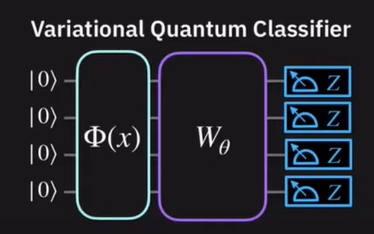

© Image Credits: [[7]](#). 

To classify a new input data point $\vec{x}$, one evaluates the expected value of the Pauli $\hat{Z}$ observable according to the measurement postulate in quantum mechanics (**see Appendix**) as follows:

\begin{align}
f_{\theta}(x) &\equiv \overbrace{\langle \Phi(x)| \hat{Z} |\Phi(x)\rangle}^\text{expected value} \\
&=\langle \Phi(x)|W^{\dagger}(\theta)\hat{Z}W(\theta)|\Phi(x)\rangle\\
&=\underbrace{\langle0^{\otimes n}|V_{\Phi}^{\dagger}(x)}_\text{feature map}\underbrace{W^{\dagger}(\theta)\hat{Z}W(\theta)}_\text{change of basis}\underbrace{V_{\Phi}(x)|0^{\otimes n}\rangle}_\text{feature map} \in [-1,1].
\end{align}

Note that $$|\Phi(x)\rangle=V_{\Phi}(x)|0^{\otimes n}\rangle,$$ 

represents the fiducial state prepared according to a data encoding procedure, i.e, is the feature vector obtained by acting the feature map circuit $V_{\Phi}(x)$ on the initial state $|0^{\otimes n}\rangle$ composed of $n$ qubits.

The predicted label corresponding to the data point $\vec{x}$ is then evaluated according to the following decision rule:

\begin{align}
\text{label}(x) \in \{+1, -1\} = \text{sign}(f_{\theta}(x)+b) = \begin{cases}
+1, \text{ if } f_{\theta}(x) \geq b. \\
-1, \text{ if } f_{\theta}(x) < b.
\end{cases}
\end{align}

Where $b \in [-1,1]$ is a user-defined threshold.

The class labels $+1$ and $-1$ of a binary classification are elements of a right coset and a left coset, respectively.

### Proof that a VQC is a linear model

Here, we provide a didactic proof that VQCs are linear models. To this end, let us define 

$$H(\theta) \stackrel{\text{def}}{\equiv} W^{\dagger}(\theta)\hat{Z}W(\theta),$$ 

as to avoid notation overload. Moving on, recall that the trace of a matrix $\hat{O}$ is map $\Tr:\mathcal{L}(\mathcal{H}) \rightarrow \mathbb{C}$ defined as the sum of the matrix diagonals

$$\Tr(\hat{O})\doteq \sum_{j=1}^d \langle o_j|\hat{O}| o_j \rangle = \sum_{j=1}^d \hat{O}_{jj},$$

with the following non-exhaustive properties for $\lambda \in \mathbb{C}, A \in \mathbb{C}^{m,n}$, $B \in \mathbb{C}^{n,m}$, and $|a\rangle, |b\rangle \in \mathbb{C}^d$:

1. $\Tr(\lambda)=\lambda$, for some scalar quantity $\lambda$.
2. $\Tr(A\lambda)=\lambda\Tr(A)$.
3. $\Tr(|a\rangle \langle b|) = \langle b|a\rangle$, the trace of the outer product is the inner product.
3. $\Tr(AB)=\Tr(BA)$, invariant under cyclic permutations.
4. $\Tr(\sum_j A_j)=\sum_j\Tr(A_j)$, the trace is a linear operation.


With that, one can write

\begin{align}
\langle \Phi(x)|H(\theta)|\Phi(x)\rangle &\stackrel{\text{1.}}{=}
\Tr\Big(\langle \Phi(x)|\color{orange}{H(\theta)|\Phi(x)\rangle}\Big) \\
&\stackrel{\text{3.}}{=} \Tr\Big(\color{orange}{H(\theta)|\Phi(x)\rangle}\langle \Phi(x)|\Big)\\
&\stackrel{\text{def}}{\equiv} \Tr (H(\theta)\phi(x)),
\end{align}

where we have defined $\phi(x) \stackrel{\text{def}}{\equiv} |\Phi(x)\rangle\langle \Phi(x)|.$ `Note that we write a number over the equal sign to identify which trace property was used`.

The next step is to decompose $H(\theta)$ and and $\phi(x)$ in the basis of the Pauli matrices (**see Appendix**):

\begin{align}
H(\theta)&=\frac{1}{2^n}\sum_{i \in 4^n} \langle H(\theta), P_{i}\rangle_{\HS} P_{i} = \frac{1}{2^n}\sum_{i \in 4^n} \Tr\Big(H(\theta)P_{i}\Big)P_{i} \equiv \frac{1}{2^n}\sum_{i \in 4^n} h_{i}(\theta)P_{i}. \\
\phi(x)&=\frac{1}{2^n}\sum_{i \in 4^n} \langle \phi(x), P_{i}\rangle_{\HS} P_{i} = \frac{1}{2^n}\sum_{i \in 4^n} \Tr\Big(\phi(x)P_{i}\Big)P_{i} \equiv \frac{1}{2^n}\sum_{i \in 4^n} \phi_{i}(x)P_{i}.
\end{align}

where $\langle A, B \rangle_{\HS} = \Tr(AB)$ denotes the `Hilbert-Schmidt inner product`, and also

\begin{align}
h_{i}(\theta) &\equiv \Tr(H(\theta)P_{i}), \\
\phi_{i}(x) &\equiv \Tr(\phi(x)P_{i}).
\end{align}

With that, and for a circuit with $n$ qubits, one has

\begin{align}
f_{\theta}(x) = \Tr \Big[H(\theta)\phi(x)\Big] &= \Tr \Bigg[ \Bigg(\frac{1}{2^n}\sum_{i \in 4^n} h_{i}(\theta)P_{i}\Bigg) \Bigg(\frac{1}{2^n}\sum_{j \in 4^n} \phi_{j}(x)P_{j}\Bigg) \Bigg]\\
&\stackrel{\text{2.}}{=}\frac{1}{4^n}\Tr \Bigg[ \Bigg(\sum_{i \in 4^n} h_{i}(\theta)P_{i}\Bigg) \Bigg(\sum_{j \in 4^n} \phi_{j}(x)P_{j}\Bigg) \Bigg]\\
&=\frac{1}{4^n}\Tr\Bigg[\sum_{i, j \in 4^n}h_{i}(\theta)\phi_{j}(x)P_{i}P_{j}\Bigg]\\
&\stackrel{\text{5.}}{=}\frac{1}{4^n}\sum_{i, j \in 4^n}h_{i}(\theta)\phi_{j}(x)\Tr(P_{i}P_{j})\\
&= \underbrace{\frac{1}{2^n}\sum_{i \in 4^n}h_{i}(\theta)\phi_{i}(x)}_\text{i=j (contraction)}.
\end{align}

The complete operation reads, explicitly

\begin{align}
f_{\theta}(x) 
&= \frac{1}{2^n}\sum_{i \in 4^n}\Tr(W^{\dagger}(\theta)\hat{Z}W(\theta)P_{i})\Tr(|\Phi(x)\rangle\langle \Phi(x)|P_{i}).
\end{align}

Since $W(\theta)$ is a low depth quantum circuit, it only parameterizes a subset of all possible observables/hyperplanes.

Let us break down this equation step by step. The second equality used the trace property no. 2 outlined above, and the exponent rule

\begin{align}
a^nb^n&=(ab)^n,
\end{align}

such that $2^n2^n=4^n$. Depending on taste, two other exponent rules can be used in sequence as well, such as 

\begin{align}
a^xa^y&=a^{x+y}\implies 2^n2^n=2^{2n},\\
a^{bn}&=(a^b)^n\implies 2^{2n} = 4^n.
\end{align}

The third equality only grouped the summations together. The fourth used the trace property no. 5. The last equality used the trace property for a product of Pauli matrices $P_i \in \mathcal{H}^{2^n}$ of dimension $\dim(P_i) = 2^n \times 2^n$ given by

$$
\Tr(P_{i}P_{j}) =2^n \delta_{jk}= 
\begin{cases}
2^n, &\text{if } i = j. \\
0, &\text{if } i \ne j,
\end{cases}
$$

whose [kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta) contributes to the contraction ($A_iB_j\delta_{ij}=A_iB_i$). 



Recall that all $2 \times 2$ Pauli matrices satisfy the following $\mathfrak{su}(2)$ Lie algebra:

\begin{align}
\Tr(\sigma_j\sigma_k)=\Tr(\delta_{jk} \mathbb{I}_{2} +i\epsilon_{ijk}\sigma_l)&=\Tr(\delta_{jk} \mathbb{I}_{2})+\Tr(i\epsilon_{ijk}\sigma_{l}) =\delta_{jk}\Tr(\mathbb{I}_{2})+i\epsilon_{ijk}\Tr(\sigma_{l})=2\delta_{jk}.
\\
\{\sigma_{\mu},\sigma_{\nu}\}&=\sigma_{\mu}\sigma_{\nu}+\sigma_{\nu}\sigma_{\mu}=2\delta_{\mu \nu}\mathbb{I}_2 \\
&\implies \sigma_{\nu}\sigma_{\mu}=2\delta_{\mu \nu}\mathbb{I}_2-\sigma_{\mu}\sigma_{\nu}\\
&\implies \Tr(\sigma_{\nu}\sigma_{\mu})=\Tr(2\delta_{\mu \nu}\mathbb{I}_2-\sigma_{\mu}\sigma_{\nu})=2\delta_{\mu \nu}\Tr(\mathbb{I}_2)-\Tr(\sigma_{\mu}\sigma_{\nu})=4\delta_{\mu \nu}-\Tr(\sigma_{\nu}\sigma_{\mu})\\
&\implies \Tr(\sigma_{\nu}\sigma_{\mu})=2\delta_{\mu\nu}.
\end{align}

It follows that for a system of $n$ qubits, $\Tr(\mathbb{I}_d)=2^n$.

Note: the generalization of the $\mathfrak{su}(2)$ Lie algebra for Pauli matrices (matrices acting on 2-level systems a.k.a qubits) is the $\mathfrak{su}(d)$ Lie algebra for generic $d$-level systems that consists of the [generalized Gell-Mann matrices](https://mathworld.wolfram.com/GeneralizedGell-MannMatrix.html) acting on qudits. 

### The Quantum Kernel Estimator (QKE)

The Quantum Kernel Estimator (QKE) algorithm \[[6](https://www.nature.com/articles/s41586-019-0980-2)] introduced by IBM in 2019 is the optimal solution for an infinite-depth $W(\theta)$ Variational Quantum Classifier (VQC). But what is a kernel? A `kernel function` is a dissimilarity measure (a.k.a distance measure) used to evaluate the distance between two distinct data points (represented by vectors) by computing the inner product of the feature map. In this way, the kernel function implicitly encodes the feature map without ever computing the feature vectors nor evaluating their inner product individually: a process known as the `kernel trick`.

The quantum kernel function $K(\vec{x}_i, \vec{x}_j)$ is the `Hilbert-Schmidt inner product` that computes the distance (dissimilarity measure) between two quantum states (or density matrices). Consider a classical dataset $\mathcal{X} =\{\vec{x}_i=(x_1, \cdots, x_N) \in \mathbb{R}^N\}|_{i=1}^M$, and a quantum feature map

$$\Phi(\vec{x}_i): \vec{x}_i \in \mathcal{X} \rightarrow |\Phi(\vec{x}_i)\rangle\langle\Phi(\vec{x}_i)| \in \mathcal{H}.$$ 

Given two data samples $\vec{x}_i$ and $\vec{x}_j \in \mathcal{X}$, the $ij$-th entry of the quantum kernel function reads:

\begin{align}
K_{ij}(\vec{x}_i, \vec{x}_j) \doteq \langle \Phi(\vec{x}_i), \Phi(\vec{x}_j)\rangle_{HS} &= \Tr(\Phi^{\dagger}(x_i)\Phi(x_j)) \\
&= \Tr\Big[|\Phi(\vec{x}_i)\rangle \color{orange}{\langle \Phi(\vec{x}_i)| \cdot |\Phi(\vec{x}_j)\rangle} \langle \Phi(\vec{x}_j)|\Big] \\
&= \color{orange}{\langle\Phi(\vec{x}_i)|\Phi(\vec{x}_j)\rangle} \Tr(|\Phi(\vec{x}_i)\rangle\langle \Phi(\vec{x}_j)|) \\
&= \langle\Phi(\vec{x}_i)|\Phi(\vec{x}_j)\rangle \langle \Phi(\vec{x}_j)|\Phi(\vec{x}_i)\rangle \\
&= \langle\Phi(\vec{x}_i)|\Phi(\vec{x}_j)\rangle \langle \Phi(\vec{x}_i)|\Phi(\vec{x}_j)\rangle^* \\
&= |\langle\Phi(\vec{x}_i)|\Phi(\vec{x}_j)\rangle|^2.
\end{align}

Where it was used the following identities for $\lambda \in \mathbb{C}, A \in M^{m,n}$, and $|a\rangle, |b\rangle \in \mathbb{C}^d$:

- $\Tr(\lambda A) = \lambda\Tr(A)$.
- $\Tr(|a\rangle \langle b|) = \langle b|a\rangle$, the trace of the outer product is the inner product.
- $\langle a|b \rangle^* = \langle b|a \rangle$.
- $\langle a|b \rangle \langle a|b \rangle^* = |\langle a|b \rangle|^2$.



Consider the following quantum kernel estimation circuit:

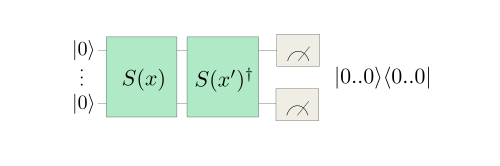

© Image Credits: [[11]](https://pennylane.ai/qml/demos/tutorial_kernel_based_training.html).

Let us define $$U_{\phi}(x) \equiv S(x')^{\dagger}S(x).$$

With $|\Phi(x)\rangle = U_{\phi}(x) |0^{\otimes n}\rangle$, one then has:

\begin{eqnarray}
\langle\Phi(x)| = (|\Phi(x)\rangle)^{\dagger} = (U_{\phi}(x) |0^{\otimes n}\rangle)^{\dagger} = (|0^{\otimes n}\rangle)^{\dagger} (U_{\phi}(x))^{\dagger} = \langle 0^{\otimes n}| U_{\phi}^{\dagger}(x).
\end{eqnarray}

And the $ij$-th entry of the quantum kernel can be obtained through a projective measurement onto the computational basis: 

\begin{align}
\langle 0^{\otimes n}| S(x)^{\dagger}S(x') |0^{\otimes n} \rangle\langle 0^{\otimes n}| S(x')^{\dagger}S(x) |0^{\otimes n}\rangle &= (\langle 0^{\otimes n}| S(x')^{\dagger}S(x) |0^{\otimes n}\rangle)^*(\langle 0^{\otimes n}| S(x')^{\dagger}S(x) |0^{\otimes n}\rangle)\\
&= |\langle 0^{\otimes n}|S(x')^{\dagger}S(x)|0^{\otimes n}\rangle|^2 \\
&= |\langle\Phi(x')|\Phi(x)\rangle|^2 \\
&= K_{ij}(x, x'),
\end{align}

where $|0^{\otimes n} \rangle\langle 0^{\otimes n}|$ is the projector operator of $n$ qubits onto the initial state $|0\rangle$.

One can note that the $ij$-th entry of the quantum kernel is just the probability of measuring the state $|0^{\otimes n}\rangle$ (**see appendix**):

\begin{align}
\langle \Phi(x) | P^{\dagger}_{o_j} P_{o_j} | \Phi(x) \rangle
&= \langle \Phi(x) |0^{\otimes n} \rangle\langle 0^{\otimes n}|\Phi(x) \rangle \\ 
&= \langle \Phi(x) |0^{\otimes n}\rangle \langle \Phi(x)| 0^{\otimes n} \rangle^*\\
&= |\langle \Phi(x) |0^{\otimes n} \rangle|^2\\
&=|\langle 0^{\otimes n}| \Phi(x) \rangle|^2\\
&=|\langle 0^{\otimes n} | \hat{U}(x) |0^{\otimes n}\rangle|^2 \\
&= |\langle 0^{\otimes n}|S(x')^{\dagger}S(x)|0^{\otimes n}\rangle|^2 \\
&= |\langle\Phi(x)|\Phi(x')\rangle|^2 \\
&= K_{ij}(x, x').
\end{align}



**Algorithm outline, adapted from [[7](#)]:**

For all $i,j$ in the training set:
1. Prepare the state according to $S(\vec{x}_i)^{\dagger}S(\vec{x}_j)$. This operation is symmetric ($i$ can be replaced by $j$).
2. Measure the probability $K_{ij}(\vec{x}_i, \vec{x}_j)$. A number of $N$ data points requires $N^2$ different quantum circuits.
3. With all the kernel entries evaluated, solve the classical convex optimization problem in the dual form $L_D(\alpha)$, where $\{\alpha_i\}$ is the set of lagrange multipliers for each training data point and $\{y_i\}$ is the set of labels:
$$\max_{\alpha} L_D(\alpha) \sum_{i \in T}\alpha_i - \frac{1}{2}\sum_{i,j \in T} y_i y_j \alpha_i \alpha_j \ \ \underbrace{\phi(x_i)^{\T}\phi(x_j)}_{K_{ij}}.$$
4. Classify the input data according to the following decision rule: 

$$\text{label}(s) \in \{+1, -1\} = \text{sign}\Big(\sum_{i\in N_s} \alpha_i K(\lambda_i, s)+b\Big).$$

In this hybrid quantum-classical algorithm, the quantum computer computes the Kernel, while the classical computer solves the optimization problem of finding the lagrange multipliers.

### The Quantum Kernel Alignment (QKA)

Quantum kernel aligment [[8](#8)] leverages the symmetry in the dataset by parameterizing a fiducial state with a parameter $\lambda$ to be optimized in the classical computer. The following image depicts the quantum kernel alignment circuit [[8](#8)], where $x$ and $\tilde{x}$ are two distinct samples (data points) often referred as $\vec{x}_i$ and $\vec{x}_j \in \mathcal{X}$:

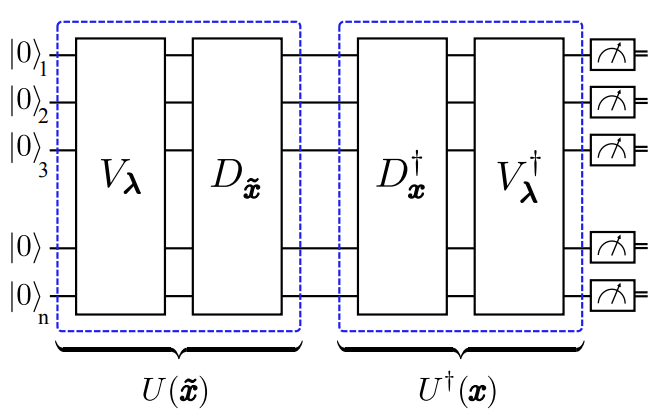

© Image Credits: [[8]](#). 

Denoting the fiducial reference state by $|\psi(\lambda)\rangle = V(\lambda) |0^{\otimes n}\rangle$, one then has:

\begin{eqnarray}
\langle\psi(\lambda)| = |\psi(\lambda)\rangle^{\dagger} = (V(\lambda) |0^{\otimes n}\rangle)^{\dagger} = (|0^{\otimes n}\rangle)^{\dagger} (V(\lambda))^{\dagger} = \langle 0^{\otimes n}| V^{\dagger}(\lambda).
\end{eqnarray}

And the feature state reads:

\begin{eqnarray}
\Phi(\vec{x}_i) = D_{\Phi}(\vec{x}_i)|\psi(\lambda)\rangle \langle\psi(\lambda)|D^{\dagger}_{\Phi}(\vec{x}_i) = D_{\Phi}(\vec{x}_i)V(\lambda) |0^{\otimes n}\rangle \langle 0^{\otimes n}| V^{\dagger}(\lambda)|D^{\dagger}_{\Phi}(\vec{x}_i)
\end{eqnarray}



In the QKA setting, the $ij$-th entry of the quantum kernel function in the explicit form is computed in the same way as the QKE, by taking the Hilbert-Schmidt inner product of two quantum feature states parameterized by distinct data points $\vec{x}_i$ and $\vec{x}_j$ from a dataset $\mathcal{X}$:

\begin{align}
K_{ij}(\vec{x}_i, \vec{x}_j) = |\langle\Phi(\vec{x}_i)|\Phi(\vec{x}_j)\rangle|^2 &= |\langle 0^{\otimes n}|U^{\dagger}_{\Phi}(\vec{x}_i)U_{\Phi}(\vec{x}_j)|0^{\otimes n}\rangle|^2\\
&=\underbrace{|\langle0^{\otimes n}|V^{\dagger}(\lambda)}_{\text{fiducial state}} \underbrace{D^{\dagger}_{\Phi}(\vec{x}_i)D_{\Phi}(\vec{x}_j)}_{\text{feature map}}\underbrace{V(\lambda)|0^{\otimes n}\rangle}_{\text{fiducial state}}|^2.
\end{align}

Note that $V(\lambda)$ is the unitary representation for the fiducial state containing the entangler gates, and $D_{\Phi}(\vec{x}_i)$ is the unitary representation of the quantum feature map for data encoding.

The classical computer then solves the min-max problem (bounding the generalization error):

$$\epsilon \le \mathcal{O}(\min_{\lambda}\max_{\alpha} F(\alpha, \lambda)/m),$$

where the Wolfe dual is
$$F(\alpha)=\sum_{i=1}^m\alpha_i - \frac{1}{2} \underbrace{\sum_{i,j=1}^m y_i y_j \alpha_i \alpha_j \ \ \overbrace{\phi(x_i)^{\T}\phi(x_j)}^{K_{ij}}}_{\text{weighted kernel alignment}}.$$

Legend:

- $\alpha$ denotes the Lagrande multipliers.
- $y_i,y_j$ denote the labels.
- $x_i, x_j$ denote the data samples.
- $m$ denotes the number of training samples.
- $K_{ij}$ denotes the kernel function.

## Cherry picking a Quantum Kernel<a name="kernel" />


Among the drawbacks of using a `classical kernel` is the increase of computational runtime as the complexity of the dataset increases, such as in the case of complex time series data. On the other hand, quantum circuits provide the advantage of mapping the classical input data to a higher dimensional space by simulating more complex kernels or `quantum kernels` that are, in principle, harder to simulate in a classical computer. It is said that quantum kernels outperform their classical counterpart when they cannot be efficiently simulated on classical computers: a `necessary but not sufficient` condition for computational advantage. 

Here, we outline three main approaches for quantum kernel design, adapted from \[[9](#9)]:

1. The choice of the quantum kernel can be either a known fixed (non-trainable) or parameterized (trainable/optimizable) variational quantum circuit ansatz in the literature that is known to be classically hard to simulate, or even a random variational quantum circuit to be adaptively optimized according to a cost function. Example: forrelation kernel.

2. The second approach consists of choosing a simple (classically easy to simulate) parameterized quantum circuit to be optimized adding complex entangled gates to increase its computational complexity with respect to a classical computer. Example: Gaussian kernel.

3. The third approach involves designing a kernel based/tailored on/to the structre of the data, and then optmizing it (e.g., kernel alignment). Example: the DLOG kernel based off of the discrete logarithm problem exploit the group structure of the data to provide a superpolynomial speed up over classical kernels [[10](#10)].

# <font color='Blue'>Appendix</font><a name="Appendix" />

## Measurement Postulate in Quantum Mechanics

### Probability


Recall that a physical observable in quantum mechanics is represented by a Hermitian ($\hat{\mathcal{O}}=\hat{\mathcal{O}}^{\dagger}$) and, therefore, Normal ($ \hat{\mathcal{O}}\hat{\mathcal{O}}^{\dagger}=\hat{\mathcal{O}}^{\dagger}\hat{\mathcal{O}}$) matrix with real eigenvalues and a diagonal representation:

\begin{eqnarray}
\hat{\mathcal{O}} = \sum_{j=1}^{d=2^n} o_j P_{o_j}= \sum_{j=1}^{d=2^n} o_j |o_j\rangle \langle o_j|.
\end{eqnarray}

Where $P_{o_j}=|o_j\rangle \langle o_j|$ is the projector operator onto the eigenspace of the observable $\hat{\mathcal{O}}$ with a $d$-dimensional orthonormal basis set $\{|o_j \rangle\}_{j=1}^d$ $\Big(\langle o_j|o_k\rangle=\delta_{jk}\Big)$ of eigenvectors $|o_j \rangle$ with eigenvalues $o_j$.

Suppose the state of a quantum system is prepared in the basis of the observable $\hat{\mathcal{O}}$ one wants to measure, i.e, $|\psi\rangle \doteq \sum_{j=1}^d c_j|o_j\rangle$. A projective measurement (a.k.a von Neumann measurement) entails the following conditional probability for obtaining the eigenvalue $o_j$ of $\hat{\mathcal{O}}$:

\begin{eqnarray} 
Pr(o_j|\psi\rangle)&=&\langle \psi | P^{\dagger}_{o_j} P_{o_j} |\psi \rangle \\ 
&=& \langle \psi | P_{o_j}^2 |\psi \rangle\\
&=& \langle \psi| (|o_j\rangle \langle o_j|o_k\rangle \langle o_k|)| \psi \rangle\\
&=&\delta_{jk}\langle\psi|o_j\rangle \langle o_k |\psi\rangle \\ 
&=& \langle\psi|o_j\rangle \langle o_j |\psi\rangle \\ 
&=& \langle \psi |o_j\rangle \langle \psi| o_j \rangle^*\\
&=& |\langle \psi|o_j \rangle|^2=|\langle o_j|\psi \rangle|^2\\
&=& \left|\langle o_j|\sum_{k=1}^{d=2^n} c_k |o_k\rangle\right|^2\\
&=&  \left|\sum_{k=1}^{d=2^n} c_k \langle o_j|o_k\rangle\right|^2\\
&=&\left|\sum_{k=1}^{d=2^n} c_k \delta_{jk} \right|^2 = |c_j|^2.
\end{eqnarray} 

This result is also known as Born's rule:

\begin{eqnarray}
Pr(o_j|\psi\rangle) \doteq |\langle o_j |\psi \rangle|^2 = |\langle \psi |o_j \rangle|^2= |c_j|^2.
\end{eqnarray}

One can note that $Pr(o_j|\psi\rangle)=1$ if and only if $|o_j\rangle=|\psi\rangle$, which is in agreement with the normalization condition:

$$\langle \psi |\psi\rangle=\Bigg(\sum_{j=1}^{d=2^n}c_j|o_j\rangle \Bigg)^{\dagger}\Bigg(\sum_{k=1}^{d=2^n} c_k |o_k\rangle \Bigg)=\sum_{j,k=1}^{d=2^n} c_j^* c_k \langle o_j|o_k\rangle= \sum_{j,k=1}^{d=2^n} c_j^* c_k \delta_{jk} = \sum_{j=1}^{d=2^n}|c_j|^2=\sum_{j=1}^{d=2^n}Pr(o_j|\psi\rangle)=1.$$

<br>

If the system has evolved from the initial state $|\psi(0)\rangle$ to the final state $|\psi(t)\rangle$, then:

\begin{eqnarray}
Pr(o_j|\psi_t\rangle) &=& |\langle o_j | \hat{U}(t) |\psi(0)\rangle|^2 \\
&=& |\langle o_j |\psi(t)\rangle|^2.
\end{eqnarray}

**Remark**

If the state $|\psi\rangle$ of the quantum system is an eigenstate of the observable being measured, the measurement outcome is `deterministic` and Einstein is right (god does not play dice). However, when $|\psi\rangle$ is not an eigenstate of the observable, then the measurement outcome is `probabilistic` and Einstein is wrong. The latter is a consequence of Heisenberg's uncertainty principle for conjugate observables that do not commute, i.e, $[\hat{A},\hat{B}] \ne \mathbb{O}$.

Examples:

- Consider a quantum system in the state $|\psi\rangle=|0\rangle$.
  - A measurement in the $\hat{Z}$ basis is deterministic: $Pr(|0\rangle)=\langle 0|\psi \rangle=|\langle 0|0 \rangle|^2=1=100\%$.
  - A measurement in the $\hat{X}$ basis is probabilistic: $Pr(|+\rangle)=\langle +|\psi \rangle=|\langle 0|H|0 \rangle|^2=1/2=50\%$.

- Consider a quantum system in the state $|\psi\rangle=|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$.
  - A measurement in the $\hat{Z}$ basis is probabilistic: $Pr(|0\rangle)=\langle 0|\psi \rangle=|\langle 0|+ \rangle|^2=1/2=50\%$.
  - A measurement in the $\hat{X}$ basis is deterministic: $Pr(|+\rangle)=\langle +|\psi \rangle=|\langle +|+ \rangle|^2=1=100\%$.

### Expectation value



The expected value of an observable $\hat{\mathcal{O}} \in \mathcal{H}$ in a quantum system prepared in the state $|\psi\rangle$ follows the measurement postulate: 

\begin{align}
\langle \hat{\mathcal{O}}\rangle &= \sum_{j=1}^{d=2^n} o_j Pr(o_j|\psi \rangle)\\
&=\sum_{j=1}^{d=2^n} o_j|\langle o_j |\psi \rangle|^2 \\
&=\sum_{j=1}^{d=2^n} o_j  \langle \psi |o_j \rangle \langle \psi |o_j \rangle^* \\
&=\sum_{j=1}^{d=2^n} o_j  \langle \psi |o_j \rangle \langle o_j|\psi \rangle \\
&= \langle \psi | \left(\sum_{j=1}^{d=2^n} o_j |o_j \rangle \langle o_j| \right) |\psi \rangle\\
&= \langle \psi | \left(\sum_{j=1}^{d=2^n} o_j P_{o_j} \right) |\psi \rangle\\
&=\langle \psi |\hat{\mathcal{O}}|\psi\rangle = \langle 0^{\otimes n}|\hat{U}^{\dagger} \hat{\mathcal{O}} \hat{U}|0^{\otimes n}\rangle \in \mathbb{R}.
\end{align}

Where

\begin{align}
|\psi \rangle &= \hat{U} |0^{\otimes n} \rangle, \\
\langle \psi | &= |\psi \rangle^{\dagger}= (\hat{U} |0^{\otimes n} \rangle)^{\dagger} = |0^{\otimes n} \rangle^{\dagger}\hat{U}^{\dagger} = \langle 0^{\otimes n}|\hat{U}^{\dagger},
\end{align}

and $\hat{U}$ denotes the unitary evolution operator, i.e, the quantum circuit that evolves the initial state $|0^{\otimes n}\rangle$ to the final state $|\psi\rangle$.

## Pauli decomposition


Since measurements in the quantum computer are performed in the computational basis a.k.a Pauli-Z basis, when the quantum observable $\hat{\mathcal{O}}$ is not diagonalized in the computational basis, a change of basis circuit is necessary to rotate from the eigenbasis of the observable into the computational basis:

$$\langle \psi| \hat{\mathcal{O}} |\psi\rangle = \langle 0^{\otimes n}|\hat{U}^{\dagger}W^{\dagger} \hat{\mathcal{O}} W\hat{U}|0^{\otimes n}\rangle \in \mathbb{R},$$

where $W$ denotes the change of basis circuit.

However, finding the change of basis circuit for a general observable is not a trivial task. Therefore, it is useful to write the Hermitian observable into the Pauli basis, i.e, decompose it into a sum of Pauli observables:

$$\hat{\mathcal{O}} = \sum_{j=1}^{d=2^n} c_j P_j, \ \ \ P_j \in \{I, X, Y, Z\}^{\otimes n}.$$


With that, the new measurement becomes

$$\langle \psi| \hat{\mathcal{O}} |\psi\rangle =\langle \psi| \Big(\sum_{j=1}^{d=2^n} c_j P_j \Big) |\psi\rangle= \sum_{j=1}^{d=2^n} c_j \langle \psi | P_j | \psi \rangle \in \mathbb{R}.$$

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="References" />

\[1] Deep Learning (Ian J. Goodfellow, Yoshua Bengio and Aaron Courville), MIT Press, 2016.

\[2] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed.

\[3] Schuld, M., & Petruccione, F.: Supervised Learning with Quantum Computers (vol. 17). [Springer, Berlin (2018)](https://link.springer.com/book/10.1007/978-3-319-96424-9)

\[4] Cybenko, G. (1989), "Approximations by superpositions of sigmoidal functions". [Mathematics of Control, Signals, and Systems, 2(4), 303–314. DOI: 10.1007/BF02551274](https://link.springer.com/article/10.1007/BF02551274).

\[5] Schuld and Killoran, "Quantum machine learning in feature Hilbert spaces", [Physical Review Letters](https://doi.org/10.1103/PhysRevLett.122.040504).

\[6] Havlíček, V., Córcoles, A.D., Temme, K. et al. Supervised learning with quantum-enhanced feature spaces. [Nature 567, 209–212 (2019)](https://doi.org/10.1038/s41586-019-0980-2).

\[7] Bryce Fuller, "Lecture 6.1 - From Variational Classifiers to Linear Classifiers", [Qiskit Global Summer School 2021](https://www.youtube.com/watch?v=m6EzmYsEOiI).

\[8] J. R. Glick, T. P. Gujarati, A. D. Córcoles, Y. Kim, A. Kandala, J. M. Gambetta, K. Temme. Covariant quantum kernels for data with group structure [arXiv:2105.03406 (2021)](https://arxiv.org/abs/2105.03406).

\[9] Jen Glick, "Lecture 7.1 - Quantum Kernels in Practice", [Qiskit Global Summer School 2021](https://www.youtube.com/watch?v=LmQcSxgINis).

\[10] Y. Liu, S. Arunachalam, and K. Temme, A rigorous and robust quantum speed-up in supervised machine learning. [arXiv:2010.02174](https://arxiv.org/abs/2010.02174) (2020).

\[11] [Kernel-based training of quantum models with scikit-learn](https://pennylane.ai/qml/demos/tutorial_kernel_based_training.html).